In [2]:
import pandas as pd
import json
from pprint import pprint
import os
import sys
from timeit import default_timer as timer
from read_json import JsonHelpers
from read_pdf import pdf2text
import re

import numpy as np


%matplotlib inline 


if sys.platform == "linux":
    studies_path = "/home/wiktor/git/MasterThesis/Literature/Competition_Studies_Database/studies.json"
    authors_path = "/home/wiktor/git/MasterThesis/Literature/Competition_Studies_Database/authors.json"
    studies_location = "/home/wiktor/Dropbox/Git/MasterThesis/Literature/Competition_Studies_Database/"
else:    
    studies_path = "/Users/Wiktor/Dropbox/Git/MasterThesis/Literature/Competition_Studies_Database/studies.json"
    authors_path = "/Users/Wiktor/Dropbox/Git/MasterThesis/Literature/Competition_Studies_Database/authors.json"
    studies_location = "/Users/Wiktor/Dropbox/Git/MasterThesis/Literature/Competition_Studies_Database/"



# Reading authors database
with open(os.path.join(authors_path)) as file:
    authors = json.load(file)

# Reading studies database
with open(os.path.join(studies_path)) as file:
    studies = json.load(file)
    

### Authors Statsistics

|                                              |     |
|----------------------------------------------|-----|
| Number of authors                            | 123 |
| Number of authors affiliated with CB         | 17  |
| Number of authors affiliated with university | 95  |
| Number of authors affiliated with private    | 13  |
| Number of authors affiliated with government | 12  |

In [15]:
json_fun = JsonHelpers(authors_path=authors_path, studies_path=studies_path) 
authors_institutions = json_fun.get_author_institution()
studies_authors = json_fun.get_study_author()

# Number of unique authors (123)
authors_institutions['author'].nunique()

# Number of authors affiliated with university (95)
sum(authors_institutions['university'])

# Number of authors affiliated with central bank (17)
sum(authors_institutions['central bank'])

# Number of authors affiliated with governmental institutions (13)
sum(authors_institutions['governmental'])

# Number of authors affiliated with governmental institutions (12)
sum(authors_institutions['private'])

12

### Studies Statistics

|                                              |     |
|----------------------------------------------|-----|
| Number of papers                            | 69 |
| Number of papers affiliated with CB         | 12  |
| Publication date range | 1989 - 2018  |
| Empirical analysis start date    | 1980 - 2009  |
| Empirical analysis end date | 1982 - 2015  |

In [39]:
df_studies = pd.DataFrame.from_dict(studies, orient='index')


# Number of articles after preprocessing (69)
len(df_studies)

# Publication date range from 1989 - 2018
df_studies.publication_date.describe()

# Empirical analysis start date: 1980 - 2009
df_studies['start period'].describe()

# Empirical analysis end date: 1982 - 2015
df_studies['end period'].describe()

# Regions/countries covered
country_list = df_studies.region.tolist()

country_list = [country for sublist in country_list for country in sublist]

# First attempt to remove duplicates
country_list = list(set(country_list))


# "Central bank" papers count: 12
# json_fun.central_bank_paper_label()
df_studies

,title,authors,publication_date,start period,end period,region,File URL,Ideas URL
p001,Assessing Competition with the Panzar-Rosse Mo...,"[{'name': 'Jacob Antoon', 'surname': 'Bikker',...",2012,1994,2004,[NULL],http://www.mitpressjournals.org/doi/pdf/10.116...,https://ideas.repec.org/a/tpr/restat/v94y2012i...
p002,Assessing Banking Sector Competition in Zimbab...,"[{'name': 'Sanderson', 'surname': 'Abel', 'ind...",2016,2009,2014,[Zimbabwe],http://www.econrsa.org/node/1217,https://ideas.repec.org/p/rza/wpaper/599.html
p003,Conduct in a Banking Monopoly,"[{'name': 'Sherrill', 'surname': 'Shaffer', 'i...",2002,1984,1999,[USA],https://link.springer.com/article/10.1023%2FA%...,https://ideas.repec.org/a/kap/revind/v20y2002i...
p004,Assessing competition in the banking industry:...,"[{'name': 'Klenio', 'surname': 'Barbosa', 'ind...",2015,2001,2012,[Brazil],https://link.springer.com/article/10.1023%2FA%...,https://ideas.repec.org/a/eee/jbfina/v50y2015i...
p005,Bank Competition and Efficiency in the FYR Mac...,"[{'name': 'Alessandro', 'surname': 'Giustinian...",2008,1997,2005,[Macedonia],http://www.asecu.gr/Seeje/issue11/GIUSTINIANI_...,https://ideas.repec.org/a/seb/journl/v6y2008i2...
p007,Assessing Competition With the Panzar-Rosse Mo...,"[{'name': 'Suzana Cristina Silva', 'surname': ...",2017,2004,2011,[European Union],http://www.gee.gov.pt/RePEc/WorkingPapers/GEE_...,https://ideas.repec.org/p/mde/wpaper/0082.html
p008,Testing for competition in the Spanish banking...,"[{'name': 'Luis', 'surname': 'Gutiérrez de Roz...",2007,1986,2005,[Spain],http://www.bde.es/f/webbde/SES/Secciones/Publi...,https://ideas.repec.org/p/bde/wpaper/0726.html
p009,"Competition, Concentration and the Relevance o...","[{'name': 'Rakesh', 'surname': 'Arrawatia', 'i...",2014,1994,2011,[India],http://gbr.sagepub.com/content/15/2/223.abstract,https://ideas.repec.org/a/sae/globus/v15y2014i...
p010,Banking competition in Africa: Subregional com...,"[{'name': 'Samuel', 'surname': 'Fosu', 'index'...",2013,2002,2009,[Africa],http://www.sciencedirect.com/science/article/p...,https://ideas.repec.org/a/eee/ememar/v15y2013i...
p011,Evaluating the state of competition of the Gre...,"[{'name': 'Anthony', 'surname': 'Rezitis', 'in...",2010,1995,2004,[Greece],http://www.sciencedirect.com/science/article/p...,https://ideas.repec.org/a/eee/intfin/v20y2010i...


## LSA: Clustering

In [147]:
 
# With removed words that occure in more than half of texts
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english',
                             use_idf=True)

# Without removed words that occure in more than half of texts
vectorizer = TfidfVectorizer(max_features=1000,
                             min_df=2, stop_words='english',
                             use_idf=True)

X_tfidf = vectorizer.fit_transform(test_data['text'])

feature_names = vectorizer.get_feature_names()



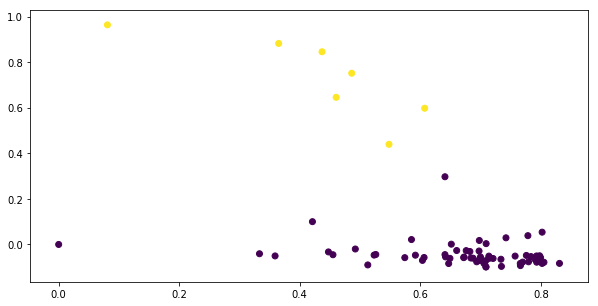

In [157]:
kmeans = KMeans(n_clusters=2).fit(X_tfidf)

svd = TruncatedSVD(n_components=2)

svd_data = svd.fit_transform(X_tfidf)
plt.figure(figsize=(10, 5))
plt.scatter(svd_data[:,0], svd_data[:,1], c = kmeans.labels_)
plt.show() 

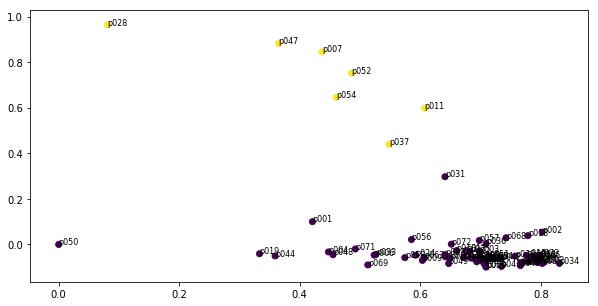

In [162]:
# Get .txt files from the directory
study_files = [file for file in os.listdir(studies_location) if '.txt' in file]

# Remove extensions
study_labels = [x.split('.')[0] for x in study_files]

# Set up plot
plt.figure(figsize=(10, 5))
plt.scatter(svd_data[:,0], svd_data[:,1], c = kmeans.labels_)

# Add labels
for i in range(len(svd_data)):
    plt.text(svd_data[i][0], svd_data[i][1], study_labels[i], size=8)

plt.show() 
